In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import _canoeValues as cv

#-------------------Inputs-------------------------------------------------------------
input_files = ["Shear_and_Moment_6 Paddlers.csv", "Shear_and_Moment_4 Paddlers.csv", "Shear_and_Moment_3 Paddlers.csv", "Shear_and_Moment_2 Paddlers.csv", "Shear_and_Moment_Display_Stand.csv"]
hf = cv.concrete_thickness # [mm]
f_c = cv.compressive_strength # [MPa]
lamda = cv.lamda
beta = cv.beta
layer1 = cv.hasLayer1 # if layer exists, it equals to 1. Otherwise, Xero.
layer2 = cv.hasLayer2 # if layer exists, it equals to 1. Otherwise, Xero.
d_mesh_1 = cv.d_mesh_1 # distance b/w the first layer of reinforcement to the surface [mm]
d_mesh_2 = cv.d_mesh_2 # distance b/w the second layer of reinforcement to the surface [mm]
concrete_thickness = cv.concrete_thickness
#-----------Reinforcement Property-------------
phi_s = cv.phi_s
fy = cv.fy # [MPa]
phi_c = cv.phi_c
E_s = cv.E_s # [MPa]
layer_unit_1 = cv.layer_unit_1 # one lap for layer 1 [mm^2/m]
layer_unit_2 = cv.layer_unit_2 # one lap for layer 2
#--------------------------------------------------------------------------------------

script_dir = os.path.abspath('')

inner_file = "Inner Hull.csv"
outer_file = "Outer Hull.csv"

file_path = os.path.join(script_dir, inner_file) # file path for the text file input
in_coor = pd.read_csv(file_path, header=None)

file_path = os.path.join(script_dir, outer_file) # file path for the text file input
out_coor = pd.read_csv(file_path, header=None)


# Calculate y-bar and Q

Shear_and_Moment_6 Paddlers.csv
I: 89897365.72662169
Q: 63048175.924387954
Concrete Thickness * 2: 36
Tau Positive: 16.933870606481033 MPa

Shear_and_Moment_4 Paddlers.csv
I: 100377504.7005419
Q: 70398251.31650954
Concrete Thickness * 2: 36
Tau Positive: 13.772274363235745 MPa

Shear_and_Moment_3 Paddlers.csv
I: 100377504.7005419
Q: 70398251.31650954
Concrete Thickness * 2: 36
Tau Positive: 11.665436147683794 MPa

Shear_and_Moment_2 Paddlers.csv
I: 100377504.7005419
Q: 70398251.31650954
Concrete Thickness * 2: 36
Tau Positive: 11.711465671091679 MPa

Shear_and_Moment_Display_Stand.csv
I: 107101455.40618432
Q: 75113992.7544819
Concrete Thickness * 2: 36
Tau Positive: 8.373462560448392 MPa



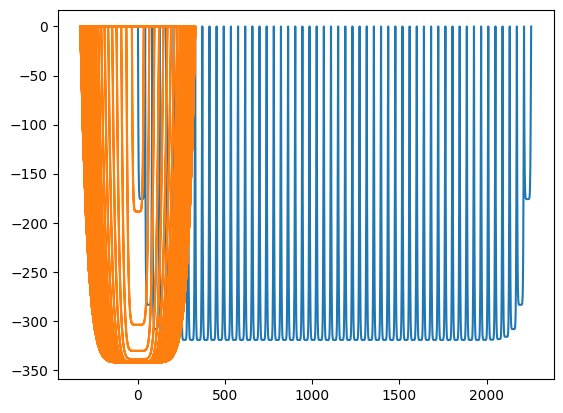

In [53]:
for input_file in input_files:
    file_path = os.path.join(script_dir, input_file)
    info = pd.read_csv(file_path, header=None)
    print(input_file)

    #x_coor = coordinates[0].iloc[1:] # get rid of [0,0,0]
    x_in = in_coor[0]
    y_in = in_coor[1]
    z_in = in_coor[2]

    x_out = out_coor[0]
    y_out = out_coor[1]
    z_out = out_coor[2]

    station_no = x_out.nunique() # number of stations
    station_out = x_out.unique() # location of each station
    station_in = x_in.unique()

    # Positive Shear
    value = float(info[1][1])
    width = float(info[3][1])
    depth = float(info[4][1])
    target_station = float(info[2][1])

    # Extract Station Information
    Y1_in = []; Z1_in = []
    Y2_in = []; Z2_in = []
    Y1_out = []; Z1_out = []
    Y2_out = []; Z2_out = []

    for k in range(1,station_no-2,1):
        if k == target_station:
            X1_in = station_in[k]
            X2_in = station_in[k+1]
            X1_out = station_out[k]
            X2_out = station_out[k+1]
            
            for i in range(0,len(x_out),1):
                if x_out[i] == X1_out:
                    Y1_out.append(y_out[i])
                    Z1_out.append(z_out[i])

                elif x_out[i] == X2_out:
                    Y2_out.append(y_out[i])
                    Z2_out.append(z_out[i])
                
                if x_in[i] == X1_in:
                    Y1_in.append(y_in[i])
                    Z1_in.append(z_in[i])

                elif x_in[i] == X2_in:
                    Y2_in.append(y_in[i])
                    Z2_in.append(z_in[i])

    #if(input_file == "Shear_and_Moment_4 Paddlers.csv"):

    # Find y_bar
    volume = 0
    product = 0 # y_bar * Volume
    for i in range(0,len(Y1_out)-1,1):
        #print("Y1 (in, out) : (" + str(Y1_in[i]) + ", " + str(Y1_out[i]) + ")\n" + "Z1 (in, out) : (" + str(Z1_in[i]) + ", " + str(Z1_out[i]) + ")")
        #print("Y2 (in, out) : (" + str(Y2_in[i]) + ", " + str(Y2_out[i]) + ")\n" + "Z2 (in, out) : (" + str(Z2_in[i]) + ", " + str(Z2_out[i]) + ")\n")
        z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
        x = (abs(X1_in-X2_in) + abs(X1_out-X2_out))/2
        y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
        z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4

        volume_i = x * y * z
        volume += volume_i
        product += volume_i * z_i

    # ybar of the canoe
    y_bar_top = abs(product/volume)
    y_bar_bottom = depth - y_bar_top

    # Find I
    I = 0
    for i in range(0,len(Y1_out)-1,1):
        z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
        y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
        z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4
        I_i = (1/12*y*z**3 + y*z*(abs(z_i) - y_bar_top)**2) # [mm^4]
        I = I + I_i



    # Find Q
    A_top_total = 0
    A_top_ybar_product = 0

    for i in range(0,len(Y1_out)-1,1):
        z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
        y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
        z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4

        if(abs(z) <= abs(y_bar_top)):
            A_top_total += y*z
            A_top_ybar_product += A_top_total * z_i

    A_top_ybar = A_top_ybar_product / A_top_total # mm

    Q = A_top_total * abs(A_top_ybar - y_bar_top) # mm^3

    tau_positive = value * Q / (I * concrete_thickness*2) # N * mm^3 / mm^4 * mm
                                                    # N/mm^2 = MPa

    print("I: " + str(I))
    print("Q: " + str(Q))
    print("Concrete Thickness * 2: " + str(concrete_thickness * 2))
    print("Tau Positive: " + str(tau_positive) + " MPa\n")

In [54]:
for input_file in input_files:
    file_path = os.path.join(script_dir, input_file)
    info = pd.read_csv(file_path, header=None)
    print(input_file)

    #x_coor = coordinates[0].iloc[1:] # get rid of [0,0,0]
    x_in = in_coor[0]
    y_in = in_coor[1]
    z_in = in_coor[2]

    x_out = out_coor[0]
    y_out = out_coor[1]
    z_out = out_coor[2]

    station_no = x_out.nunique() # number of stations
    station_out = x_out.unique() # location of each station
    station_in = x_in.unique()

    # Positive Shear
    value = float(info[1][2])
    width = float(info[3][2])
    depth = float(info[4][2])
    target_station = float(info[2][2])

    # Extract Station Information
    Y1_in = []; Z1_in = []
    Y2_in = []; Z2_in = []
    Y1_out = []; Z1_out = []
    Y2_out = []; Z2_out = []

    for k in range(1,station_no-2,1):
        if k == target_station:
            X1_in = station_in[k]
            X2_in = station_in[k+1]
            X1_out = station_out[k]
            X2_out = station_out[k+1]
            
            for i in range(0,len(x_out),1):
                if x_out[i] == X1_out:
                    Y1_out.append(y_out[i])
                    Z1_out.append(z_out[i])

                elif x_out[i] == X2_out:
                    Y2_out.append(y_out[i])
                    Z2_out.append(z_out[i])
                
                if x_in[i] == X1_in:
                    Y1_in.append(y_in[i])
                    Z1_in.append(z_in[i])

                elif x_in[i] == X2_in:
                    Y2_in.append(y_in[i])
                    Z2_in.append(z_in[i])

    # Find y_bar
    volume = 0
    product = 0 # y_bar * Volume
    for i in range(0,len(Y1_out)-1,1):
        #print("Y1 (in, out) : (" + str(Y1_in[i]) + ", " + str(Y1_out[i]) + ")\n" + "Z1 (in, out) : (" + str(Z1_in[i]) + ", " + str(Z1_out[i]) + ")")
        #print("Y2 (in, out) : (" + str(Y2_in[i]) + ", " + str(Y2_out[i]) + ")\n" + "Z2 (in, out) : (" + str(Z2_in[i]) + ", " + str(Z2_out[i]) + ")\n")
        z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
        x = (abs(X1_in-X2_in) + abs(X1_out-X2_out))/2
        y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
        z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4

        volume_i = x * y * z
        volume += volume_i
        product += volume_i * z_i

    # ybar of the canoe
    y_bar_top = abs(product/volume)
    y_bar_bottom = depth - y_bar_top

    # Find I
    I = 0
    for i in range(0,len(Y1_out)-1,1):
        z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
        y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
        z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4
        I_i = (1/12*y*z**3 + y*z*(abs(z_i) - y_bar_top)**2) # [mm^4]
        I = I + I_i



    # Find Q
    A_top_total = 0
    A_top_ybar_product = 0

    for i in range(0,len(Y1_out)-1,1):
        z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
        y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
        z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4

        if(abs(z) <= abs(y_bar_top)):
            A_top_total += y*z
            A_top_ybar_product += A_top_total * z_i

    A_top_ybar = A_top_ybar_product / A_top_total # mm

    Q = A_top_total * abs(A_top_ybar - y_bar_top) # mm^3

    tau_negative = abs(value * Q / (I * concrete_thickness*2)) # N * mm^3 / mm^4 * mm
                                                    # N/mm^2 = MPa

    torsion_negative = value * width/1000

    print("Tau Negative: " + str(tau_negative) + " MPa\n")

Shear_and_Moment_6 Paddlers.csv
Tau Negative: 14.39856865780819 MPa

Shear_and_Moment_4 Paddlers.csv
Tau Negative: 15.14627374041979 MPa

Shear_and_Moment_3 Paddlers.csv
Tau Negative: 18.36851521107555 MPa

Shear_and_Moment_2 Paddlers.csv
Tau Negative: 11.685182998818734 MPa

Shear_and_Moment_Display_Stand.csv
Tau Negative: 8.373462578945773 MPa

